# **1. Which regions or clusters exhibit the highest engagement with promotional activities?**

In [1]:
import pandas as pd

data1 = pd.read_csv('/content/sample_data/csv1.csv')
data1

TerritoryName CountryRegionCode  DiscountedProductCount
0         Germany                DE                      42
1  United Kingdom                GB                      68
2       Northeast                US                      64
3       Australia                AU                      28
4          France                FR                      64
5         Central                US                      65
6       Southwest                US                      92
7          Canada                CA                      94
8       Northwest                US                      90
9       Southeast                US                      67

In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TerritoryName           10 non-null     object
 1   CountryRegionCode       10 non-null     object
 2   DiscountedProductCount  10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


**Preprocessing data2**

In [3]:
# Combine columns into 'Territory'
data1['Territory'] = data1['TerritoryName'] + ' (' + data1['CountryRegionCode'] + ')'

# Delete original columns
data1 = data1.drop(['TerritoryName', 'CountryRegionCode'], axis=1)

In [4]:
data1

DiscountedProductCount            Territory
0                      42         Germany (DE)
1                      68  United Kingdom (GB)
2                      64       Northeast (US)
3                      28       Australia (AU)
4                      64          France (FR)
5                      65         Central (US)
6                      92       Southwest (US)
7                      94          Canada (CA)
8                      90       Northwest (US)
9                      67       Southeast (US)

from matplotlib import pyplot as plt
data1['DiscountedProductCount'].plot(kind='hist', bins=20, title='DiscountedProductCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data1['DiscountedProductCount'].plot(kind='line', figsize=(8, 4), title='DiscountedProductCount')
plt.gca().spines[['top', 'right']].set_visible(False)

**Plotting data1**

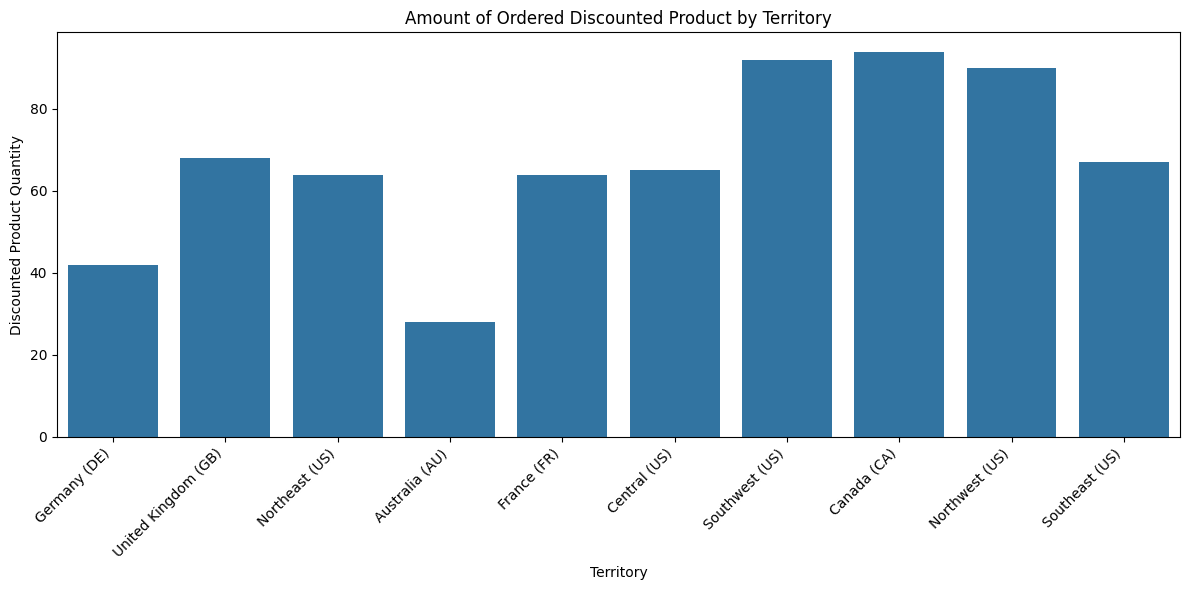

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' is your DataFrame

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Territory', y='DiscountedProductCount', data=data1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Territory')
plt.ylabel('Discounted Product Quantity')
plt.title('Amount of Ordered Discounted Product by Territory')
plt.tight_layout()
plt.show()

# **Chart Analysis**
1. Key Observations:
- Top Performers:

 + Canada (CA) has the highest order quantity, with 94 units.
 + Southwest (US) is close behind with 92 units, and Northwest (US) follows with 90 units.
 + These regions demonstrate a strong demand for discounted products.
- Mid-Range Performers:

 + Territories such as United Kingdom (GB) (68), Northeast (US) (64), France (FR) (64), Central (US) (65), and Southeast (US) (67) form the mid-tier group.
 + These regions show consistent but moderate interest in discounted products.
- Low Performers:

 + Germany (DE) (42) and Australia (AU) (28) exhibit the lowest order quantities, lagging behind other territories significantly.
 + Australia (AU), in particular, shows a notably low demand compared to others.
2. Insights:
- North American Regions (Canada, Southwest US, and Northwest US) dominate in terms of discounted product demand.
- European Regions vary widely: while the UK and France perform moderately well, Germany underperforms.
- Australia's Low Engagement: The demand in Australia is significantly lower, possibly due to market-specific factors or lower interest in discounted products.

# **2. Which products under discount have the most order quantity in different market regions?**

In [10]:
import pandas as pd

data2 = pd.read_csv('/content/sample_data/csv2.csv')
data2

TerritoryName CountryRegionCode                      ProductName  \
0       Australia                AU                  Classic Vest, S   
1          Canada                CA       Long-Sleeve Logo Jersey, L   
2         Central                US            Full-Finger Gloves, L   
3          France                FR                  Classic Vest, S   
4         Germany                DE                  Classic Vest, S   
5       Northeast                US                  Classic Vest, S   
6       Northwest                US       Women's Mountain Shorts, S   
7       Southeast                US       Women's Mountain Shorts, S   
8       Southwest                US            Full-Finger Gloves, L   
9  United Kingdom                GB  Short-Sleeve Classic Jersey, XL   

   TotalOrderQty  
0        2286960  
1        5018382  
2         196416  
3        2905128  
4        2844672  
5         176280  
6        9081600  
7         208032  
8       11805744  
9        2126388

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TerritoryName      10 non-null     object
 1   CountryRegionCode  10 non-null     object
 2   ProductName        10 non-null     object
 3   TotalOrderQty      10 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


**Preprocessing data3**

In [12]:
# Combine columns into 'Territory'
data2['Territory'] = data2['TerritoryName'] + ' (' + data2['CountryRegionCode'] + ')'

# Delete original columns
data2 = data2.drop(['TerritoryName', 'CountryRegionCode'], axis=1)

data2

ProductName  TotalOrderQty            Territory
0                  Classic Vest, S        2286960       Australia (AU)
1       Long-Sleeve Logo Jersey, L        5018382          Canada (CA)
2            Full-Finger Gloves, L         196416         Central (US)
3                  Classic Vest, S        2905128          France (FR)
4                  Classic Vest, S        2844672         Germany (DE)
5                  Classic Vest, S         176280       Northeast (US)
6       Women's Mountain Shorts, S        9081600       Northwest (US)
7       Women's Mountain Shorts, S         208032       Southeast (US)
8            Full-Finger Gloves, L       11805744       Southwest (US)
9  Short-Sleeve Classic Jersey, XL        2126388  United Kingdom (GB)

**Plotting data3**

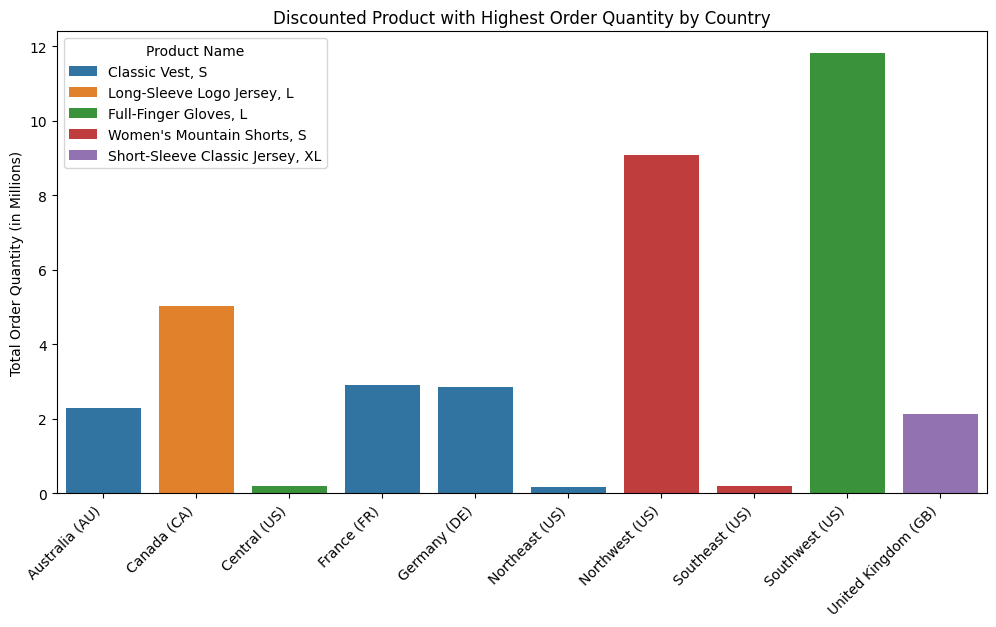

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convert TotalOrderQty to millions
data2['TotalOrderQty'] = data2['TotalOrderQty'] / 1000000

plt.figure(figsize=(12, 6))

sns.barplot(x='Territory', y='TotalOrderQty', hue='ProductName', data=data2)

plt.xlabel('')
plt.ylabel('Total Order Quantity (in Millions)')  # Updated y-axis label
plt.title('Discounted Product with Highest Order Quantity by Country')
plt.xticks(rotation=45, ha='right')
_ = plt.legend(title='Product Name')

plt.show() # to display the plot

# **Chart Analysis**
1. Key Observations:
- Top Performers:

 + Southwest (US) is the highest, with 11.8M units, significantly outperforming other regions.
 + Northwest (US) is the second highest, with 9.1M units.
 + These two regions alone account for a large share of the total orders, highlighting their dominant demand.
- Moderate Performers:

 + Canada (CA) performs well, with 5.0M units.
 + France (FR) (2.9M), Germany (DE) (2.8M), and Australia (AU) (2.3M) show moderate demand.
 + The United Kingdom (GB) follows closely with 2.1M units.
- Low Performers:

 + Regions like Central (US), Northeast (US), and Southeast (US) have the lowest demand, each with approximately 0.2M units.
2. Insights:
- Regional Demand Concentration:

 + Southwest (US) and Northwest (US) have exceptionally high demand, possibly due to larger populations, higher consumer interest, or effective promotional strategies in these regions.
 + The North American regions (Canada and parts of the US) dominate overall demand.
- European Performance:

 + European countries like France and Germany perform moderately well, but their demand is far behind the US's top regions.
 + The United Kingdom (GB) lags slightly compared to its European peers.
- Underperforming Regions:

 + Central (US), Northeast (US), and Southeast (US) exhibit significantly lower demand, indicating the need for targeted marketing strategies.